In [4]:
%matplotlib inline
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

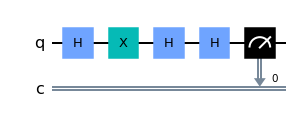

In [6]:
circ = QuantumCircuit(1,1)
circ.h(0)
circ.x(0)
circ.h(0)
circ.h(0)
circ.measure(0,0)
circ.draw(output = 'mpl')


In [45]:
print (circ.qasm())


OPENQASM 2.0;
include "qelib1.inc";
qreg q[1];
creg c[1];
h q[0];
x q[0];
h q[0];
h q[0];
measure q[0] -> c[0];



{'0': 514, '1': 510}


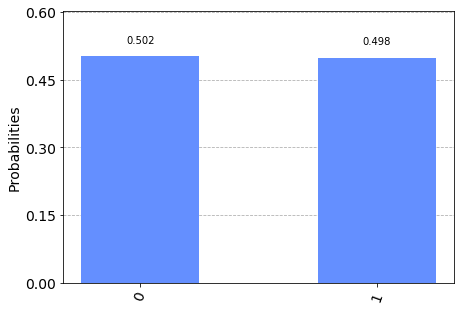

In [46]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ,backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
plot_histogram(counts)

In [47]:
#getting statevector
circ2 = QuantumCircuit(1,1)
circ2.h(0)
circ2.x(0)
circ2.h(0)
circ2.h(0)
backend = Aer.get_backend('statevector_simulator')
job = execute(circ2,backend)
result = job.result()
output = result.get_statevector(circ2)
print(output)


[0.70710678+0.j 0.70710678+0.j]


In [48]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ2,backend)
result = job.result()
unitary = result.get_unitary(circ2)
print(unitary)

[[ 0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j]]


In [49]:
provider = IBMQ.load_account()
provider.backends()
for b in provider.backends():
    print(b.status().to_dict())

ibmqfactory.load_account:WARNING:2021-06-22 03:00:05,527: Credentials are already in use. The existing account in the session will be replaced.


{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 4, 'status_msg': 'active'}
{'backend_name': 'ibmqx2', 'backend_version': '2.3.6', 'operational': True, 'pending_jobs': 718, 'status_msg': 'active'}
{'backend_name': 'ibmq_16_melbourne', 'backend_version': '2.3.25', 'operational': True, 'pending_jobs': 46, 'status_msg': 'active'}
{'backend_name': 'ibmq_armonk', 'backend_version': '2.4.11', 'operational': True, 'pending_jobs': 3, 'status_msg': 'active'}
{'backend_name': 'ibmq_athens', 'backend_version': '1.3.20', 'operational': True, 'pending_jobs': 86, 'status_msg': 'active'}
{'backend_name': 'ibmq_santiago', 'backend_version': '1.3.23', 'operational': True, 'pending_jobs': 118, 'status_msg': 'active'}
{'backend_name': 'ibmq_lima', 'backend_version': '1.0.12', 'operational': True, 'pending_jobs': 69, 'status_msg': 'active'}
{'backend_name': 'ibmq_belem', 'backend_version': '1.0.13', 'operational': True, 'pending_jobs': 13, 'status_

{'0': 490, '1': 534}


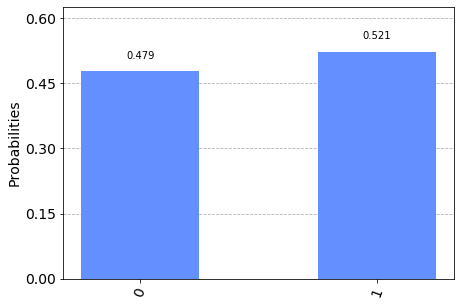

In [50]:
backend_sim = provider.get_backend('ibmq_qasm_simulator')
job_sim = execute(circ,backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
plot_histogram(counts)


In [51]:
backend = provider.get_backend('ibmq_armonk')
job = execute(circ,backend)
job_monitor(job)

Job Status: job has successfully run


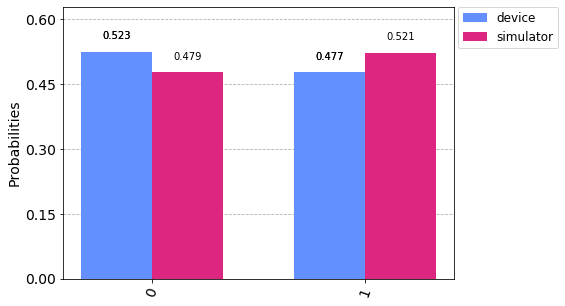

In [52]:
result= job.result()
counts_exp = result.get_counts()
plot_histogram([counts_exp,counts],legend=['device','simulator'])